# Measurement of Carbon Footprint

####  The primary goal is to calculate and analyze the carbon footprint for different entities represented in the dataset. This involves estimating the total greenhouse gas emissions, including carbon dioxide (CO2), expressed in tons of CO2 equivalent (CO2e).

In [1]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)

-- Attaching core tidyverse packages ----------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load the dataset
dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [3]:
# Calculate total CO2e emissions for each entity
dataset <- dataset %>%
  mutate(Total_CO2e = Scope1_Emissions + Scope2_Emissions + Scope3_Emissions)

In [4]:
# Summary statistics
summary_stats <- dataset %>%
  group_by(Company) %>%
  summarise(
    Mean_CO2e = mean(Total_CO2e),
    Max_CO2e = max(Total_CO2e),
    Min_CO2e = min(Total_CO2e)
  )

In [5]:
# Print summary statistics
print(summary_stats)

# A tibble: 100,000 x 4
   Company        Mean_CO2e Max_CO2e Min_CO2e
   <chr>              <dbl>    <dbl>    <dbl>
 1 Company 1          7433.    7433.    7433.
 2 Company 10        10357.   10357.   10357.
 3 Company 100        4769.    4769.    4769.
 4 Company 1000       8694.    8694.    8694.
 5 Company 10000      8856.    8856.    8856.
 6 Company 100000     8083.    8083.    8083.
 7 Company 10001     12524.   12524.   12524.
 8 Company 10002     10994.   10994.   10994.
 9 Company 10003     10521.   10521.   10521.
10 Company 10004     10351.   10351.   10351.
# i 99,990 more rows


In [6]:
# Visualize the distribution of CO2e emissions
plot_co2e <- ggplot(dataset, aes(x = Total_CO2e)) +
  geom_histogram(binwidth = 500, fill = "blue", alpha = 0.7) +
  labs(x = "Total CO2e Emissions", y = "Frequency",
       title = "Distribution of Total CO2e Emissions") +
  theme_minimal()

In [7]:
# Save the CO2e emissions image
ggsave("co2e_emissions_distribution.png", plot_co2e, width = 8, height = 6)

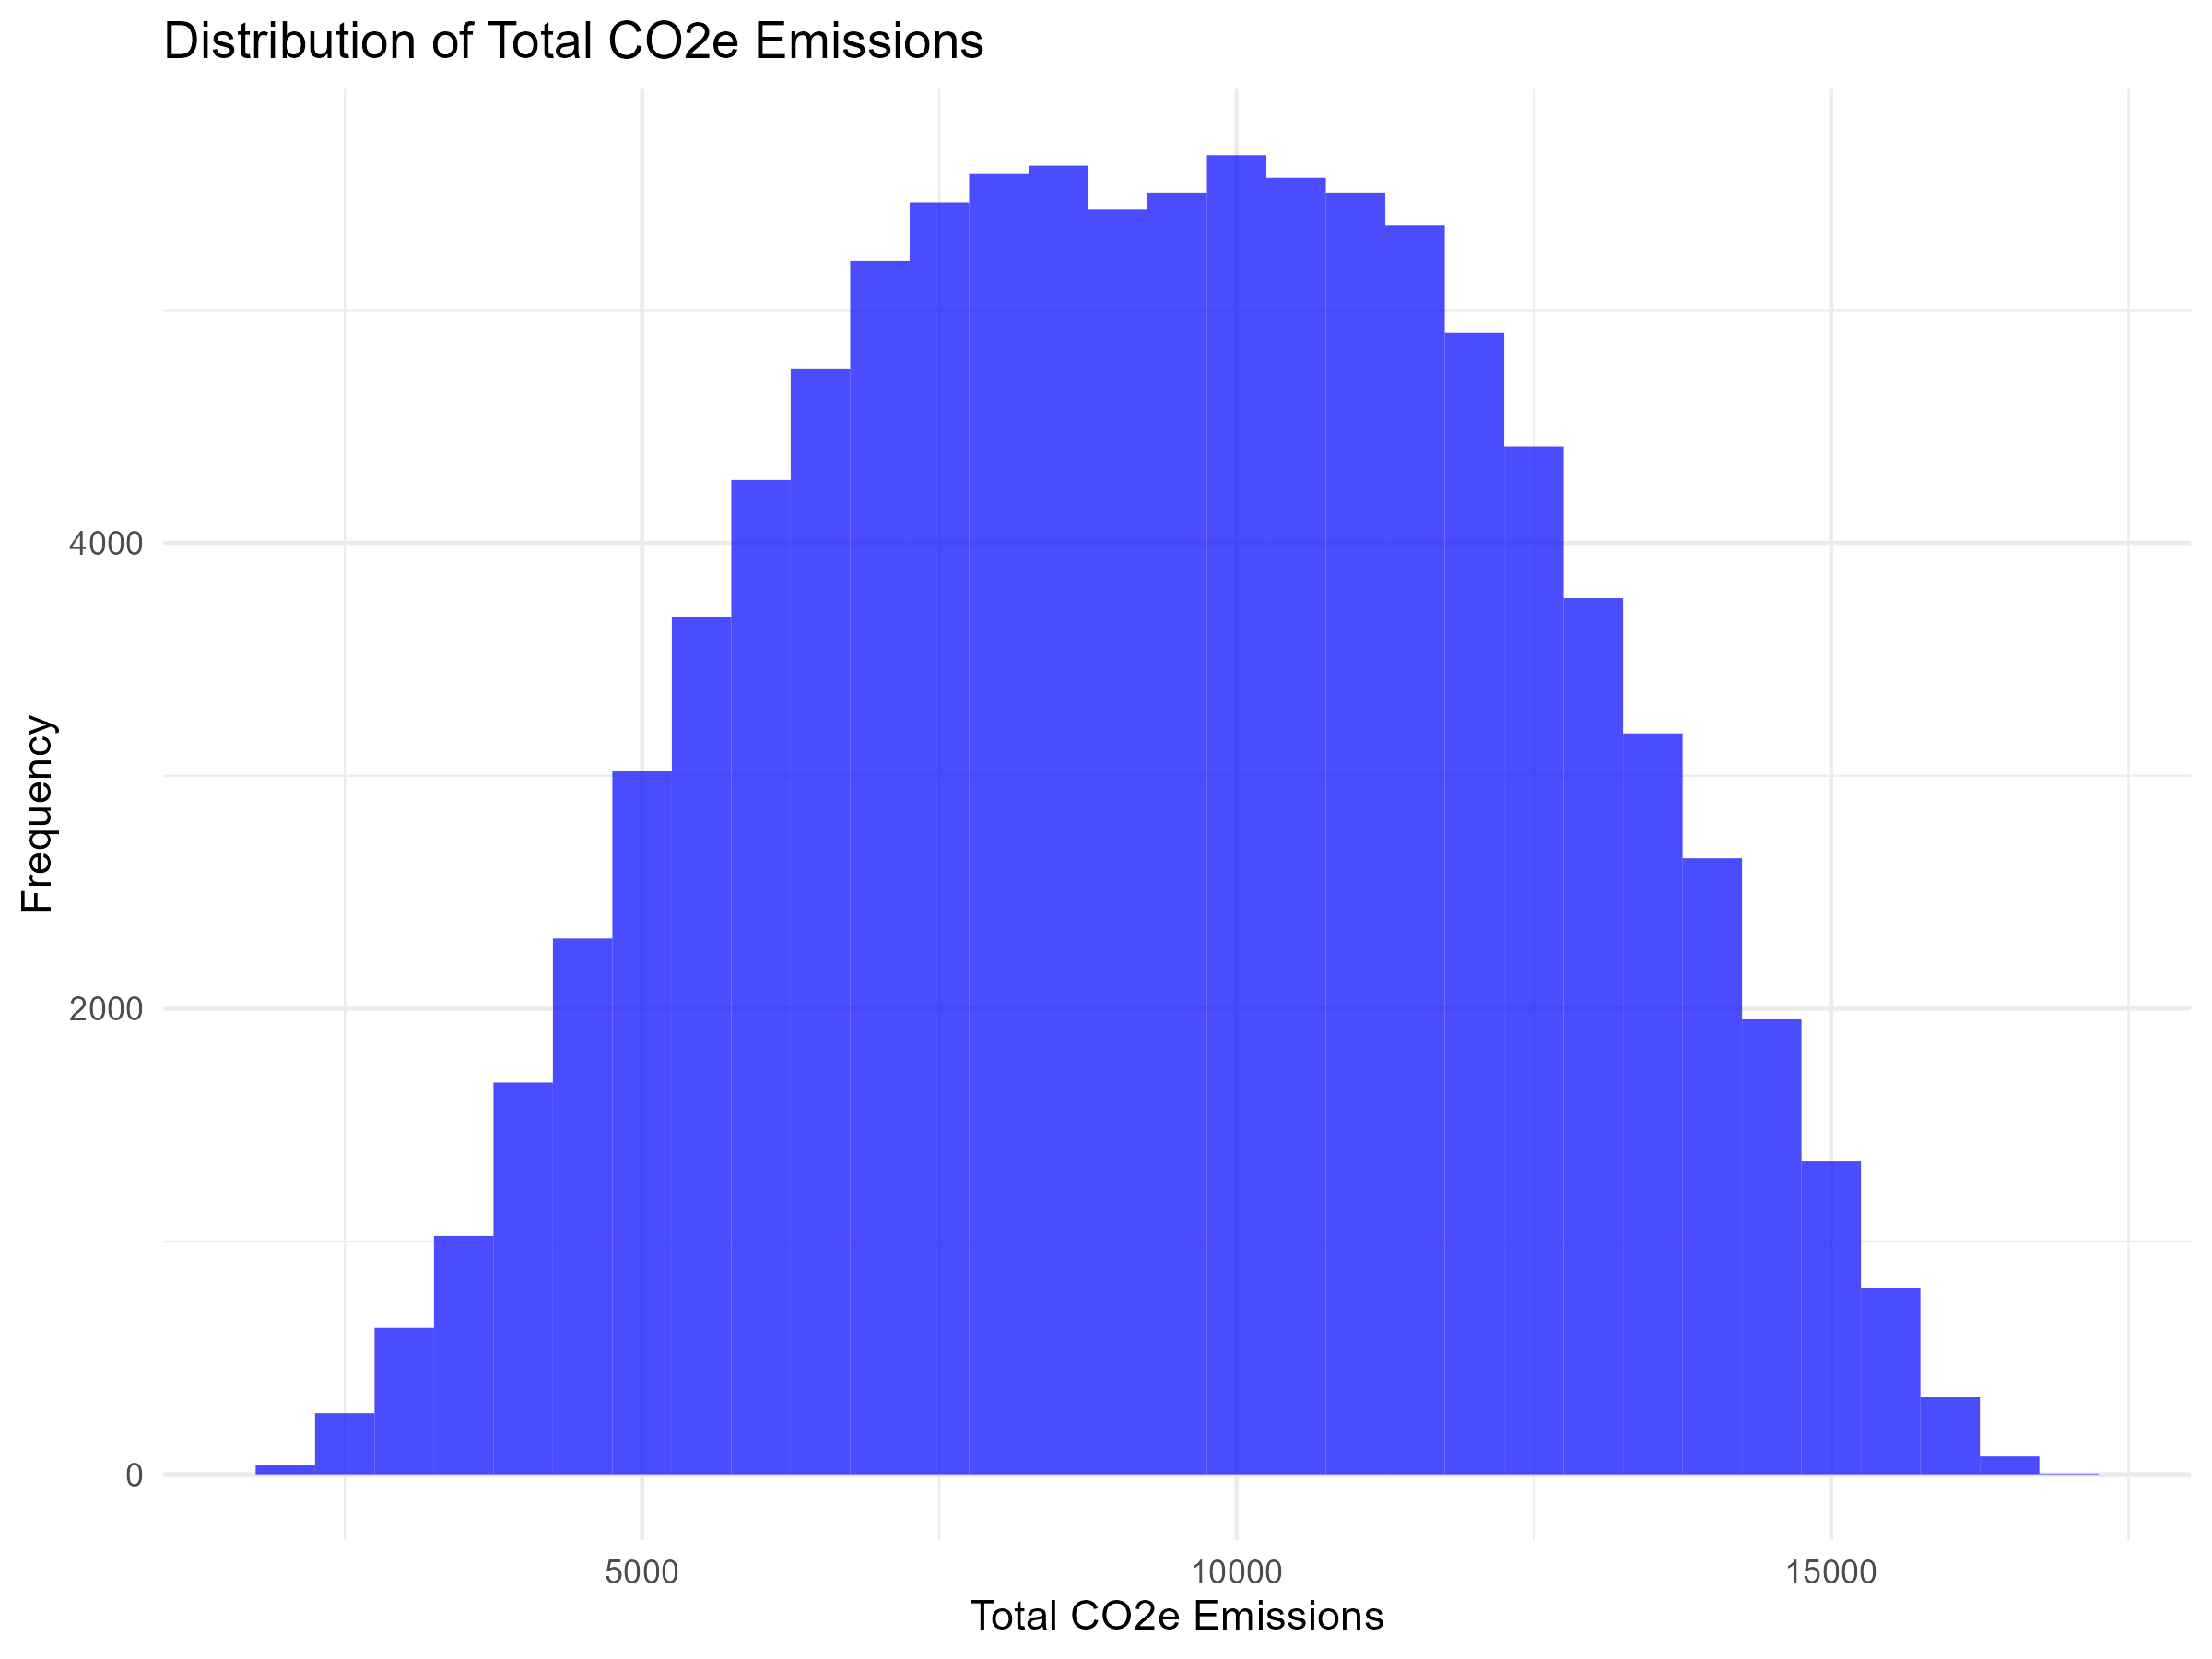

In [8]:
# import the library for display the png file
library(IRdisplay)
display_png(file = "co2e_emissions_distribution.png")

#### The above histogram shows the distribution of total CO2e emissions.

# Identify Emission Sources

####  We want to identify the major sources of emissions, such as direct emissions from operations (Scope 1), indirect emissions from purchased electricity (Scope 2), and emissions from the supply chain (Scope 3). Understanding these sources helps in prioritizing carbon reduction efforts.

In [9]:
# Load necessary libraries
library(tidyverse)

In [10]:
# Load the dataset
cleaned_carbon_footprint_calculated_dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [11]:
# Filter data for each scope
scope1_data <- cleaned_carbon_footprint_calculated_dataset %>%
  select(Year, Scope1_Emissions, Energy_Consumption, Production_Volume, Transportation_Distance, Waste_Generated, Revenue, Total_Scope1_Emissions)

scope2_data <- cleaned_carbon_footprint_calculated_dataset %>%
  select(Year, Scope2_Emissions, Energy_Consumption, Production_Volume, Transportation_Distance, Waste_Generated, Revenue, Total_Scope2_Emissions)

scope3_data <- cleaned_carbon_footprint_calculated_dataset %>%
  select(Year, Scope3_Emissions, Energy_Consumption, Production_Volume, Transportation_Distance, Waste_Generated, Revenue, Total_Scope3_Emissions)

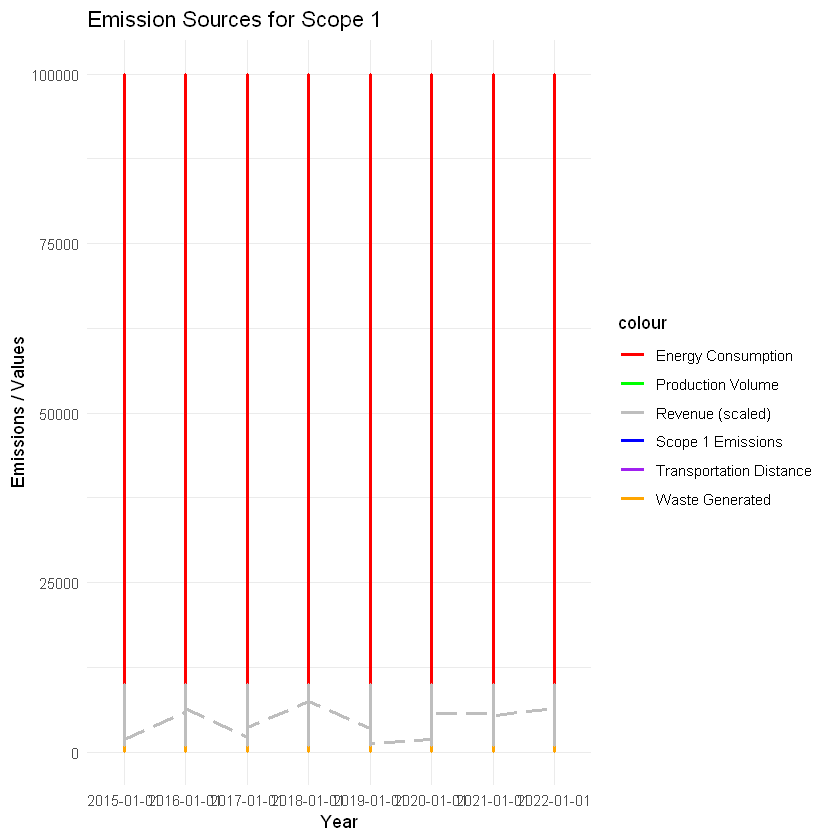

In [12]:
# Visualize emissions by source for scope 1
scope1_plot <- ggplot(scope1_data, aes(x = Year)) +
  geom_line(aes(y = Scope1_Emissions, color = "Scope 1 Emissions"), linewidth = 1) +
  geom_line(aes(y = Energy_Consumption, color = "Energy Consumption"), linetype = "dashed", linewidth = 1) +
  geom_line(aes(y = Production_Volume, color = "Production Volume"), linetype = "dotted", linewidth = 1) +
  geom_line(aes(y = Transportation_Distance, color = "Transportation Distance"), linetype = "dotdash", linewidth = 1) +
  geom_line(aes(y = Waste_Generated, color = "Waste Generated"), linetype = "twodash", linewidth = 1) +
  geom_line(aes(y = Revenue / 1000, color = "Revenue (scaled)", group = 1), linetype = "longdash", linewidth = 1) +
  labs(x = "Year", y = "Emissions / Values", title = "Emission Sources for Scope 1") +
  scale_color_manual(values = c("Scope 1 Emissions" = "blue", "Energy Consumption" = "red", "Production Volume" = "green", 
                                "Transportation Distance" = "purple", "Waste Generated" = "orange", "Revenue (scaled)" = "gray")) +
  theme_minimal()

# Save the plot as an image
ggsave("scope1_plot.png", plot = scope1_plot, width = 8, height = 6, dpi = 300)

print(scope1_plot)

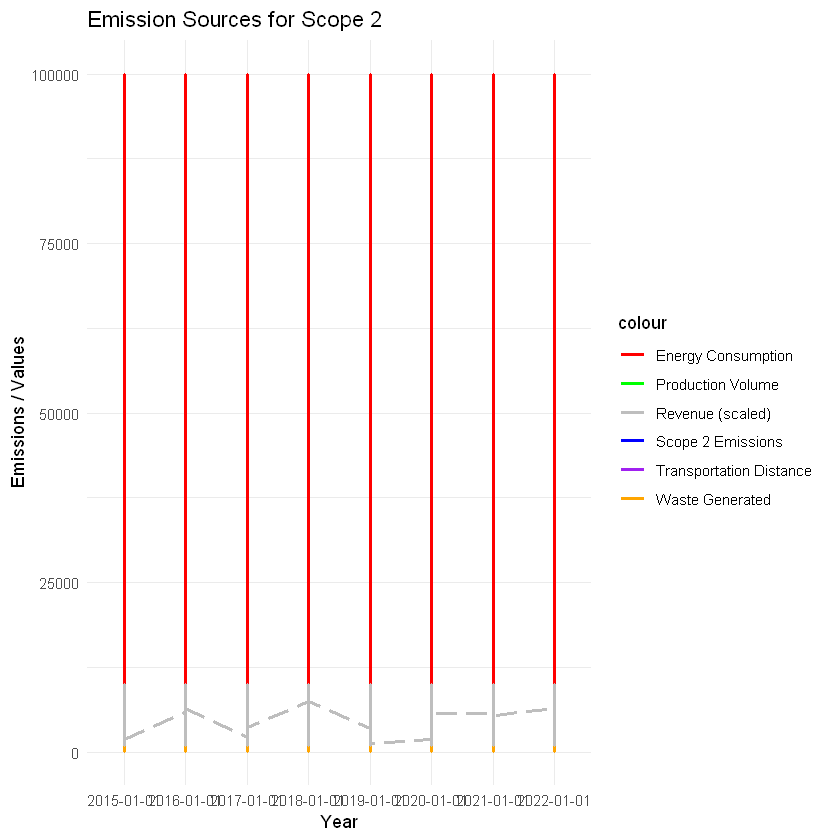

In [13]:
# Visualize emissions by source for scope 2
scope2_plot <- ggplot(scope2_data, aes(x = Year)) +
  geom_line(aes(y = Scope2_Emissions, color = "Scope 2 Emissions"), linewidth = 1) +
  geom_line(aes(y = Energy_Consumption, color = "Energy Consumption"), linetype = "dashed", linewidth = 1) +
  geom_line(aes(y = Production_Volume, color = "Production Volume"), linetype = "dotted", linewidth = 1) +
  geom_line(aes(y = Transportation_Distance, color = "Transportation Distance"), linetype = "dotdash", linewidth = 1) +
  geom_line(aes(y = Waste_Generated, color = "Waste Generated"), linetype = "twodash", linewidth = 1) +
  geom_line(aes(y = Revenue / 1000, color = "Revenue (scaled)", group = 1), linetype = "longdash", linewidth = 1) +
  labs(x = "Year", y = "Emissions / Values", title = "Emission Sources for Scope 2") +
  scale_color_manual(values = c("Scope 2 Emissions" = "blue", "Energy Consumption" = "red", "Production Volume" = "green", 
                                "Transportation Distance" = "purple", "Waste Generated" = "orange", "Revenue (scaled)" = "gray")) +
  theme_minimal()

# Save the plot as an image
ggsave("scope2_plot.png", plot = scope2_plot, width = 8, height = 6, dpi = 300)

print(scope2_plot)

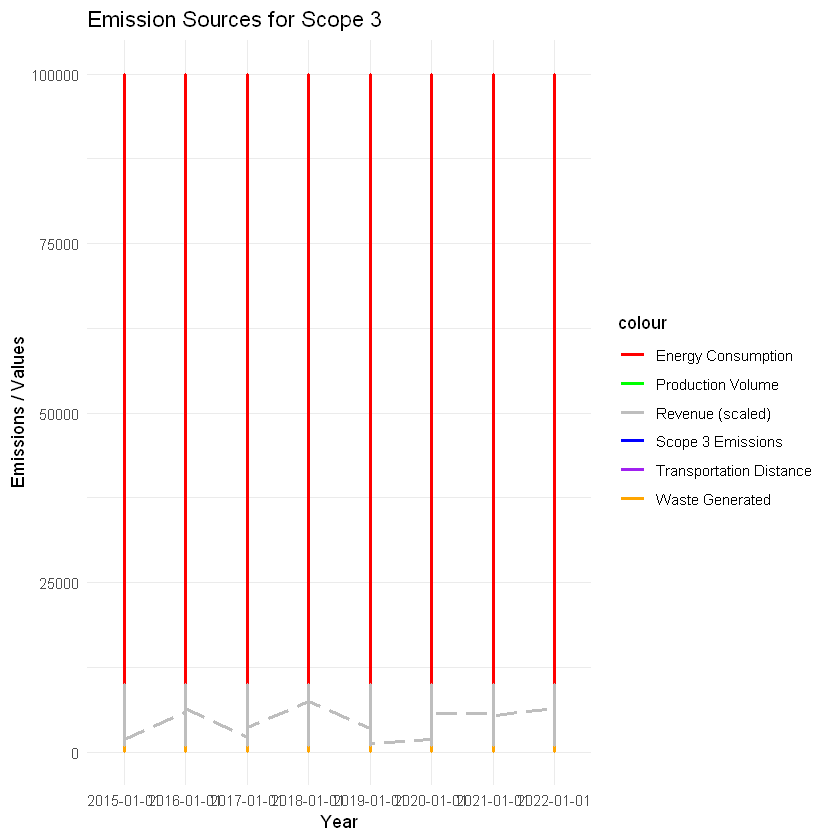

In [14]:
# Visualize emissions by source for scope 3
scope3_plot <- ggplot(scope3_data, aes(x = Year)) +
  geom_line(aes(y = Scope3_Emissions, color = "Scope 3 Emissions"), linewidth = 1) +
  geom_line(aes(y = Energy_Consumption, color = "Energy Consumption"), linetype = "dashed", linewidth = 1) +
  geom_line(aes(y = Production_Volume, color = "Production Volume"), linetype = "dotted", linewidth = 1) +
  geom_line(aes(y = Transportation_Distance, color = "Transportation Distance"), linetype = "dotdash", linewidth = 1) +
  geom_line(aes(y = Waste_Generated, color = "Waste Generated"), linetype = "twodash", linewidth = 1) +
  geom_line(aes(y = Revenue / 1000, color = "Revenue (scaled)", group = 1), linetype = "longdash", linewidth = 1) +
  labs(x = "Year", y = "Emissions / Values", title = "Emission Sources for Scope 3") +
  scale_color_manual(values = c("Scope 3 Emissions" = "blue", "Energy Consumption" = "red", "Production Volume" = "green", 
                                "Transportation Distance" = "purple", "Waste Generated" = "orange", "Revenue (scaled)" = "gray")) +
  theme_minimal()

# Save the plot as an image
ggsave("scope3_plot.png", plot = scope3_plot, width = 8, height = 6, dpi = 300)

print(scope3_plot)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




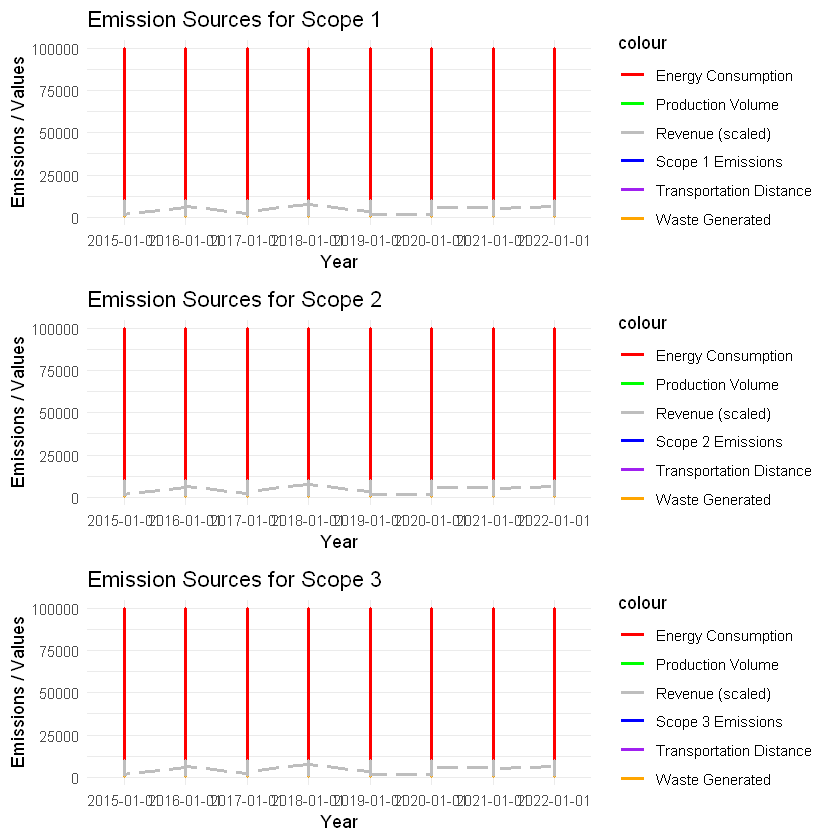

In [15]:
# Arrange the plots using gridExtra library
library(gridExtra)
grid.arrange(scope1_plot, scope2_plot, scope3_plot, ncol = 1)

# Energy Efficiency and Resource Optimization

#### Analyzing energy consumption and production volumes can reveal opportunities for energy efficiency improvements and resource optimization, leading to reduced carbon emissions.

In [16]:
# import necessary libraries
library(tidyverse)

In [17]:
# Load the cleaned dataset
cleaned_dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [18]:
# Calculate energy efficiency metric
cleaned_dataset <- cleaned_dataset %>%
  mutate(Energy_Efficiency = Production_Volume / Energy_Consumption)

In [19]:
# Filter data points with low Energy Efficiency
low_energy_efficiency <- cleaned_dataset %>%
  filter(Energy_Efficiency < 0.0238046834595857)

In [20]:
# Display the filtered data points
print(low_energy_efficiency)

           Company       Year Scope1_Emissions Scope2_Emissions
1    Company 56804 2015-01-01          5539.20          2417.57
2     Company 8975 2015-01-01          1760.20          2546.21
3    Company 39083 2015-01-01          9325.70          1120.44
4    Company 44556 2015-01-01          6478.79          2347.48
5    Company 15234 2015-01-01          1845.31          3072.35
6    Company 80525 2015-01-01          5867.18          3523.49
7    Company 24703 2015-01-01          1544.67          1902.58
8    Company 24702 2015-01-01          5081.60          2636.89
9    Company 39097 2015-01-01          6992.95          4290.89
10   Company 15231 2015-01-01          1529.76          4289.64
11   Company 24698 2015-01-01          1833.48          3096.54
12   Company 95562 2015-01-01          4698.34          2379.78
13   Company 39103 2015-01-01          9328.93           927.34
14   Company 80514 2015-01-01          2150.48          2054.75
15   Company 49806 2015-01-01          9

In [21]:
# Visualize energy efficiency and resource optimization
plot <- ggplot(cleaned_dataset, aes(x = Energy_Consumption, y = Production_Volume, color = Energy_Efficiency)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_gradient(low = "red", high = "green", guide = "legend") +
  labs(x = "Energy Consumption", y = "Production Volume", color = "Energy Efficiency") +
  theme_minimal()

In [22]:
# save the plot
ggsave("energy_efficiency_optimization.png", plot, width = 8, height = 6)

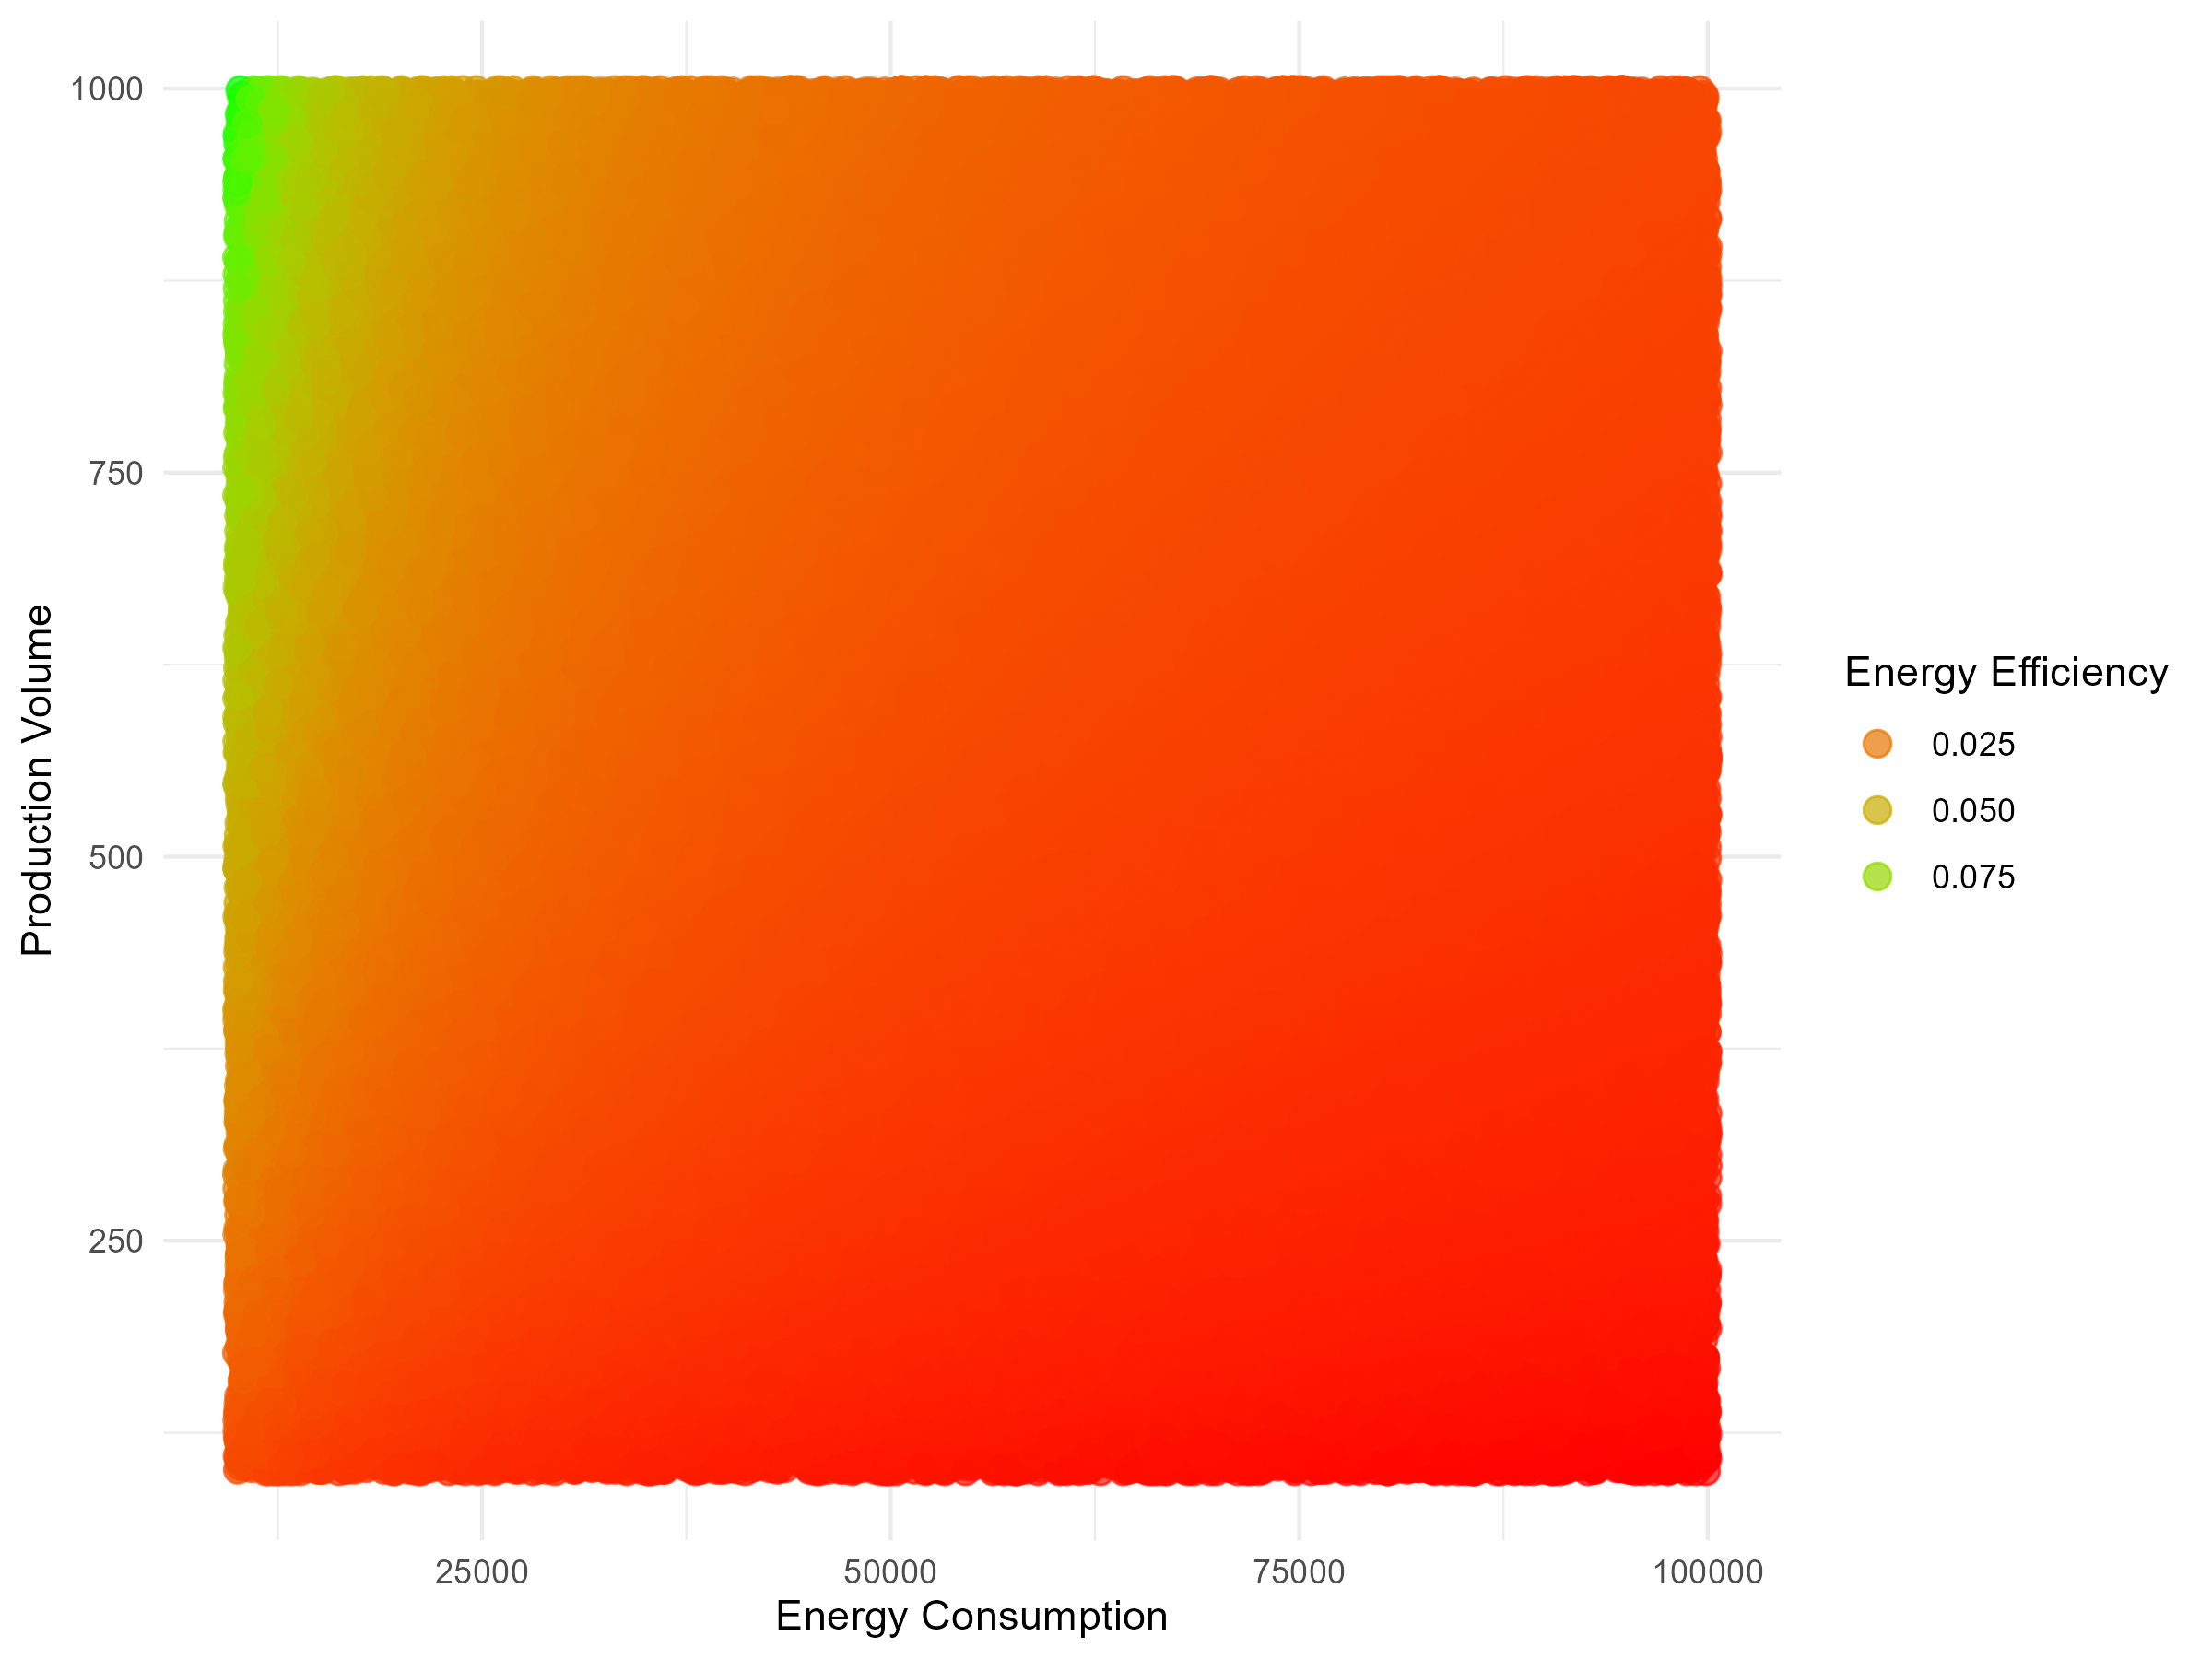

In [23]:
# import the library for display the png file
library(IRdisplay)
display_png(file = "energy_efficiency_optimization.png")

####  This heat map shows that the areas with high energy consumption relative to production volume are represented by the red and orange points on the graph. These points indicate low energy efficiency and may represent potential opportunities for optimization.

## K- means clustering

In [24]:
# Select relevant columns for clustering
clustering_data <- cleaned_dataset %>%
  select(Energy_Efficiency)

In [25]:
# Perform k-means clustering
set.seed(123)  # For reproducibility
k <- 3  # Number of clusters to identify
kmeans_result <- kmeans(clustering_data, centers = k)

In [26]:
# Get cluster centers
cluster_centers <- kmeans_result$centers

In [27]:
# Sort cluster centers to identify threshold values
sorted_centers <- sort(cluster_centers)

In [28]:
# Set a threshold based on cluster centers
threshold_value <- sorted_centers[2]

In [29]:
# Filter data points with low Energy Efficiency based on the determined threshold
low_energy_efficiency <- cleaned_dataset %>%
  filter(Energy_Efficiency < threshold_value)

In [30]:
# Display the threshold value
print(paste("Threshold Value:", threshold_value))

[1] "Threshold Value: 0.0238046834595857"


In [31]:
# Display the filtered data points
print(low_energy_efficiency)

           Company       Year Scope1_Emissions Scope2_Emissions
1    Company 56804 2015-01-01          5539.20          2417.57
2     Company 8975 2015-01-01          1760.20          2546.21
3    Company 39083 2015-01-01          9325.70          1120.44
4    Company 44556 2015-01-01          6478.79          2347.48
5    Company 15234 2015-01-01          1845.31          3072.35
6    Company 80525 2015-01-01          5867.18          3523.49
7    Company 24703 2015-01-01          1544.67          1902.58
8    Company 24702 2015-01-01          5081.60          2636.89
9    Company 39097 2015-01-01          6992.95          4290.89
10   Company 15231 2015-01-01          1529.76          4289.64
11   Company 24698 2015-01-01          1833.48          3096.54
12   Company 95562 2015-01-01          4698.34          2379.78
13   Company 39103 2015-01-01          9328.93           927.34
14   Company 80514 2015-01-01          2150.48          2054.75
15   Company 49806 2015-01-01          9

# Transportation Impact

#### Understanding transportation-related emissions, such as those from logistics or commuting, can guide decisions on sustainable transportation practices.

In [32]:
# import necessary libraries
library(tidyverse)

In [33]:
# Read the cleaned dataset
cleaned_dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [34]:
# Calculate transportation impact
cleaned_dataset <- cleaned_dataset %>%
  mutate(Transportation_Impact = Transportation_Distance * Total_Carbon_Footprint)

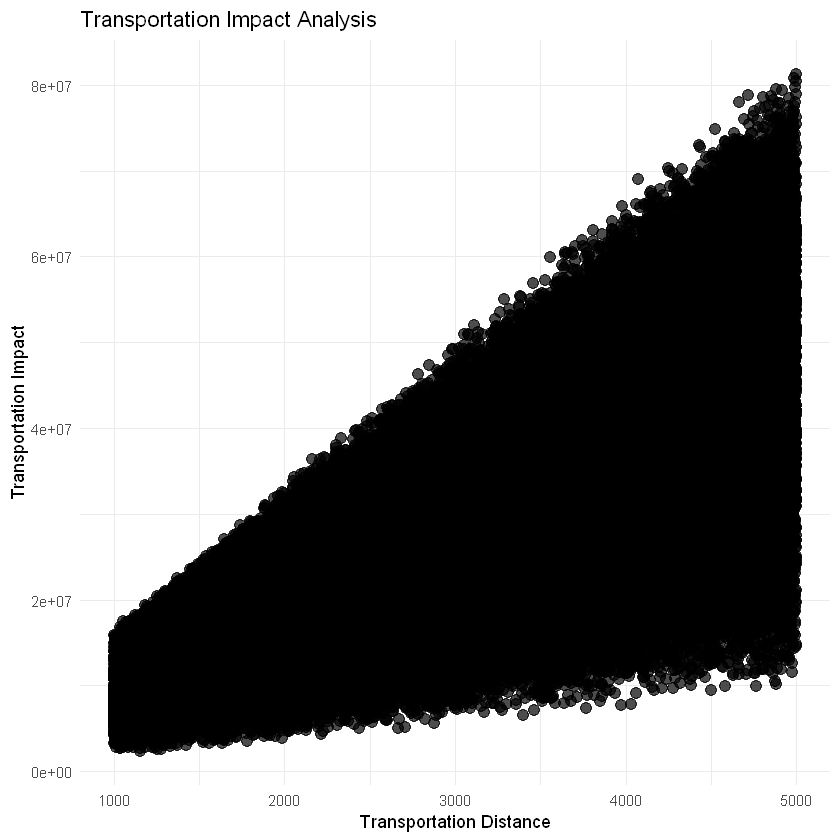

In [35]:
# Visualize transportation impact
ggplot(cleaned_dataset, aes(x = Transportation_Distance, y = Transportation_Impact)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(x = "Transportation Distance", y = "Transportation Impact", 
       title = "Transportation Impact Analysis") +
  theme_minimal()

#### This scatter plot shows that there is a positive relationship between transportation distance and transportation impact. The data points are densely packed in the lower left corner and become spreaded towards the upper right corner, indicating that as transportation distance increases, so does transportation impact.

In [36]:
# Save the image
ggsave("transportation_impact_analysis.png", width = 8, height = 6)

# Waste Management

#### Analyzing waste generation and disposal can offer insights into waste management strategies that reduce environmental impact.

In [37]:
# Load necessary libraries
library(tidyverse)

In [38]:
# Read the cleaned dataset
cleaned_dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [39]:
# Visualize waste generation and disposal
waste_plot <- ggplot(cleaned_dataset, aes(x = Year, y = Waste_Generated)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(x = "Year", y = "Waste Generated", 
       title = "Waste Management Analysis") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [40]:
# Save the image
ggsave("waste_generation_analysis.png", plot = waste_plot, width = 10, height = 6)

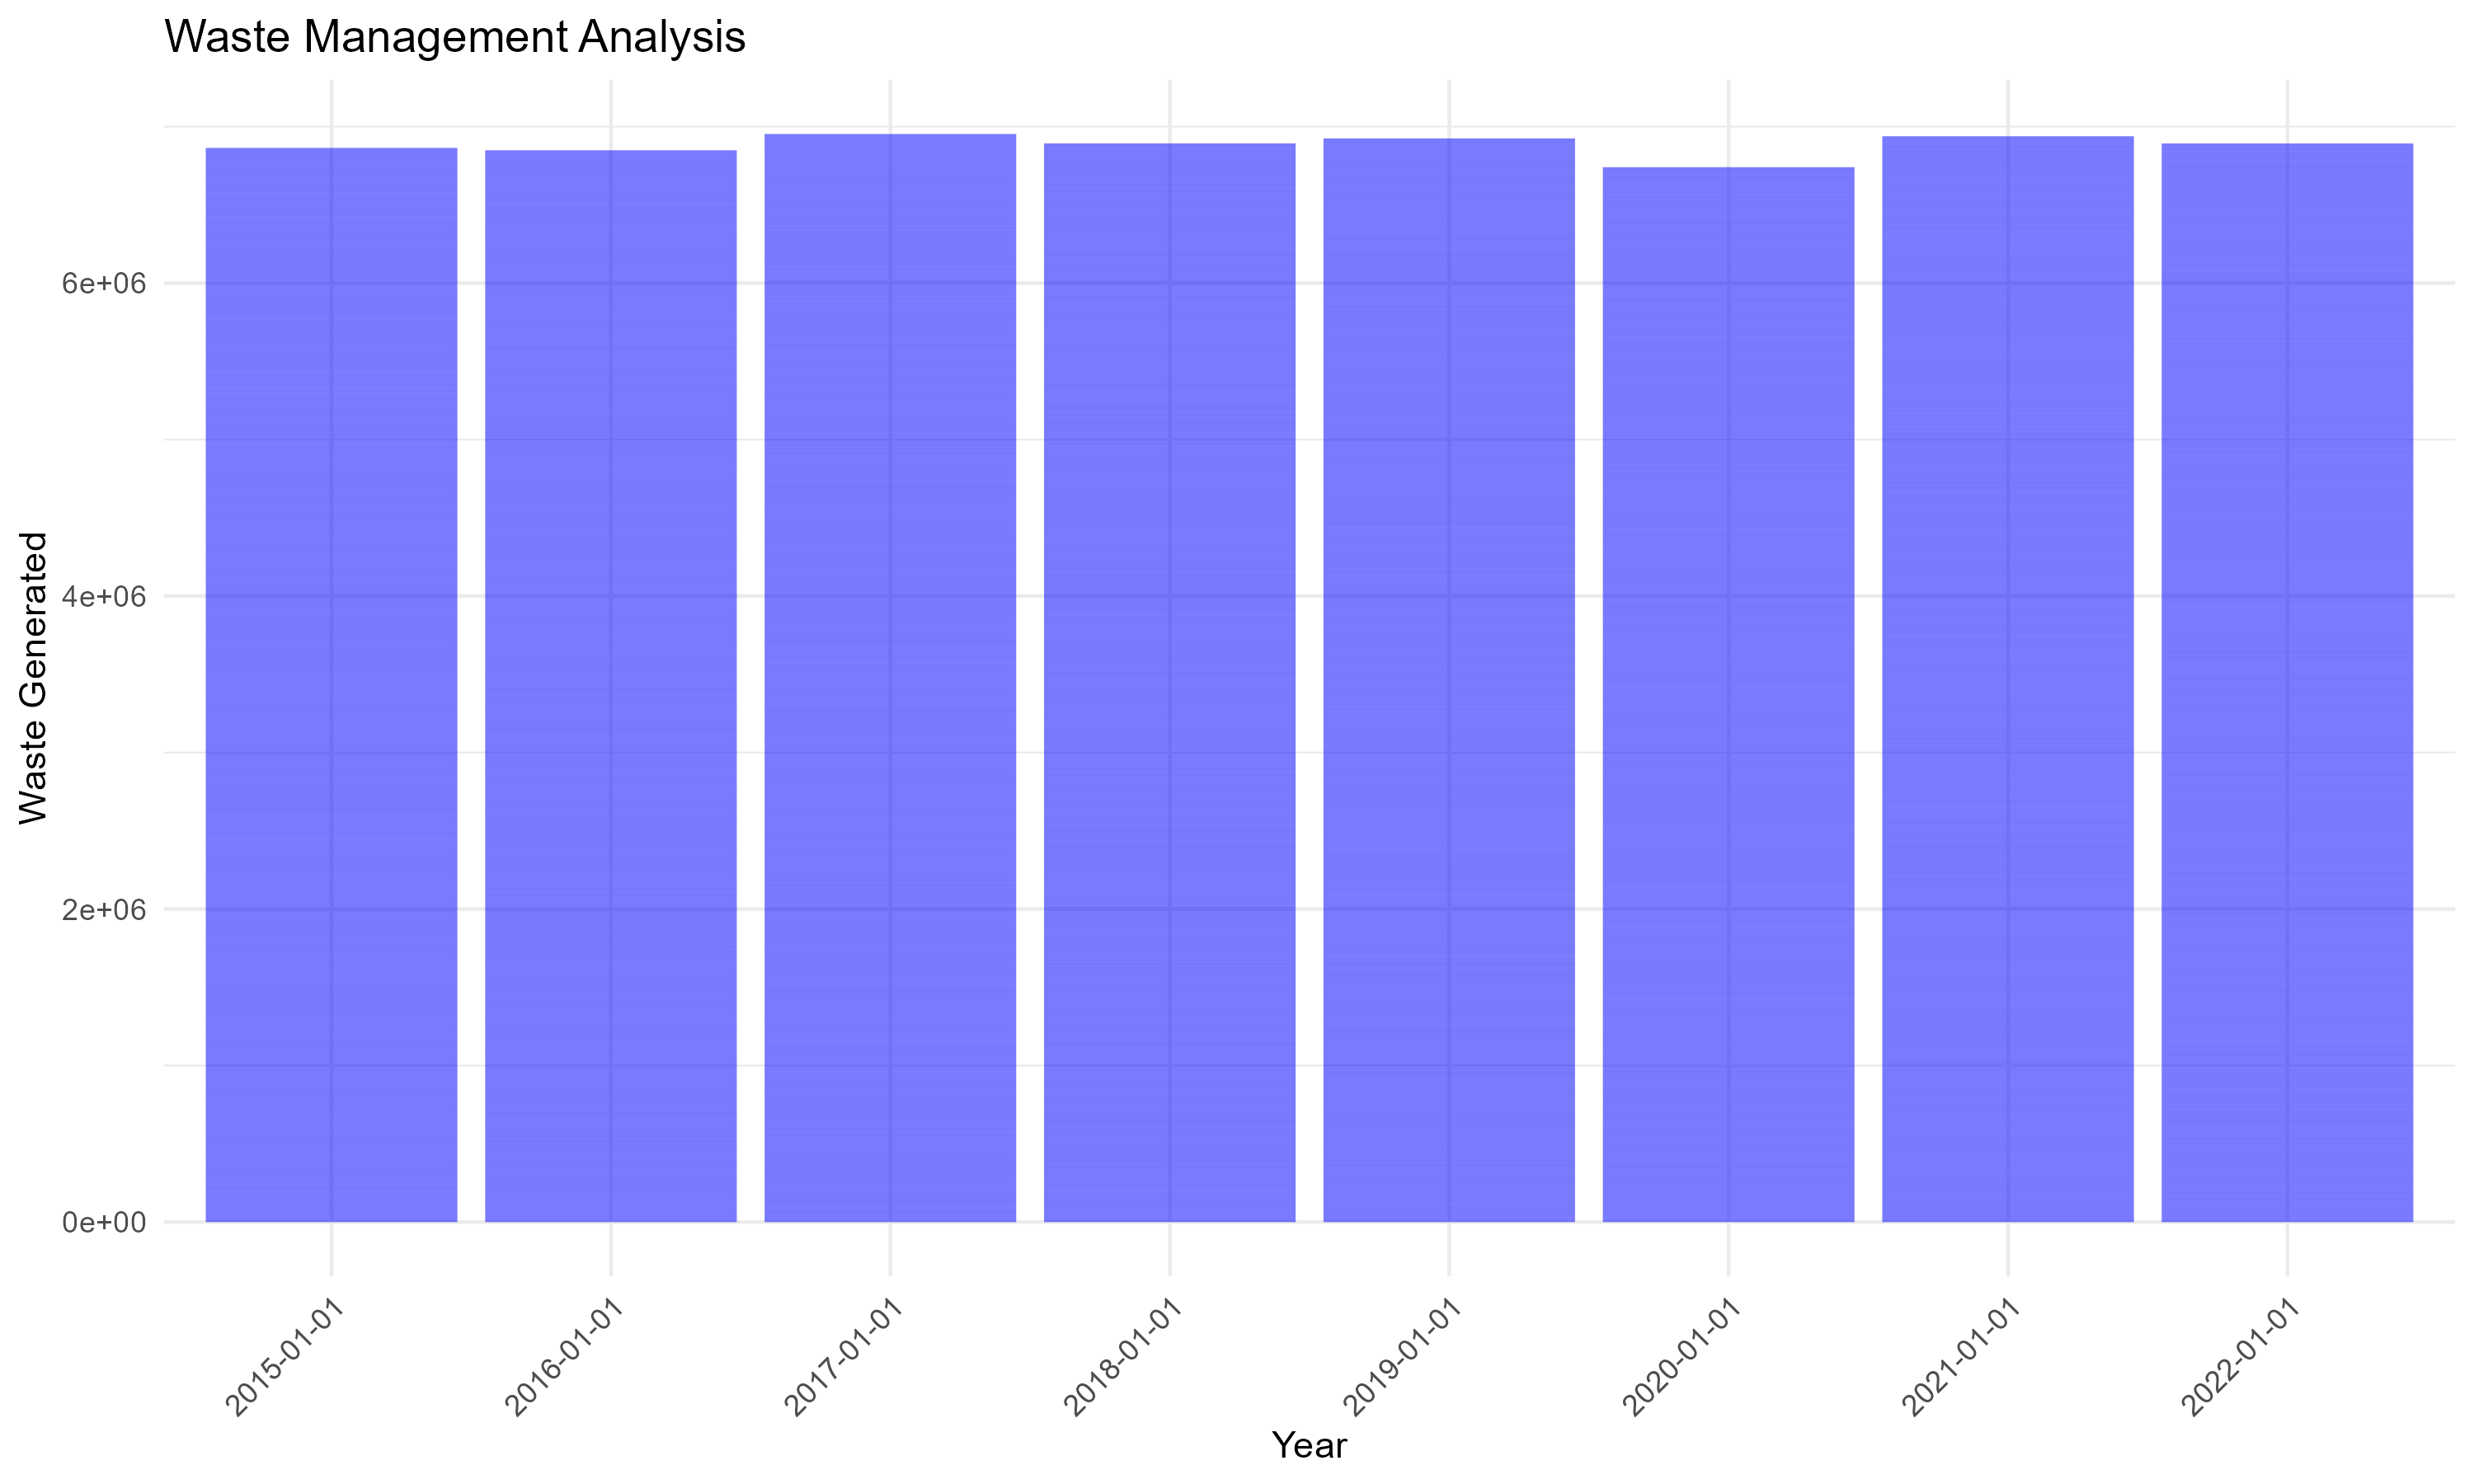

In [41]:
# import the library for display the png file
library(IRdisplay)
display_png(file = "waste_generation_analysis.png")

#### This bar plot show that the waste generated has remained consistent across all years from 2015 to 2022. This suggests that there may be opportunities to implement waste management strategies to reduce the environmental impact of waste generation.

# Revenue and Environmental Impact

#### Exploring the relationship between revenue and carbon footprint can help identify whether higher revenue is associated with higher emissions or whether certain businesses are more environmentally responsible.

In [42]:
# Load necessary libraries
library(tidyverse)

In [43]:
# Read the cleaned dataset
cleaned_dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [44]:
# Visualize Revenue and Environmental Impact
revenue_impact_plot <- ggplot(cleaned_dataset, aes(x = Revenue, y = Total_Carbon_Footprint)) +
  geom_point(size = 3, alpha = 0.7, color = "blue") +
  labs(x = "Revenue", y = "Total Carbon Footprint", 
       title = "Revenue and Environmental Impact Analysis") +
  theme_minimal()

In [45]:
# Save the image
ggsave("revenue_impact_analysis.png", plot = revenue_impact_plot, width = 10, height = 6)

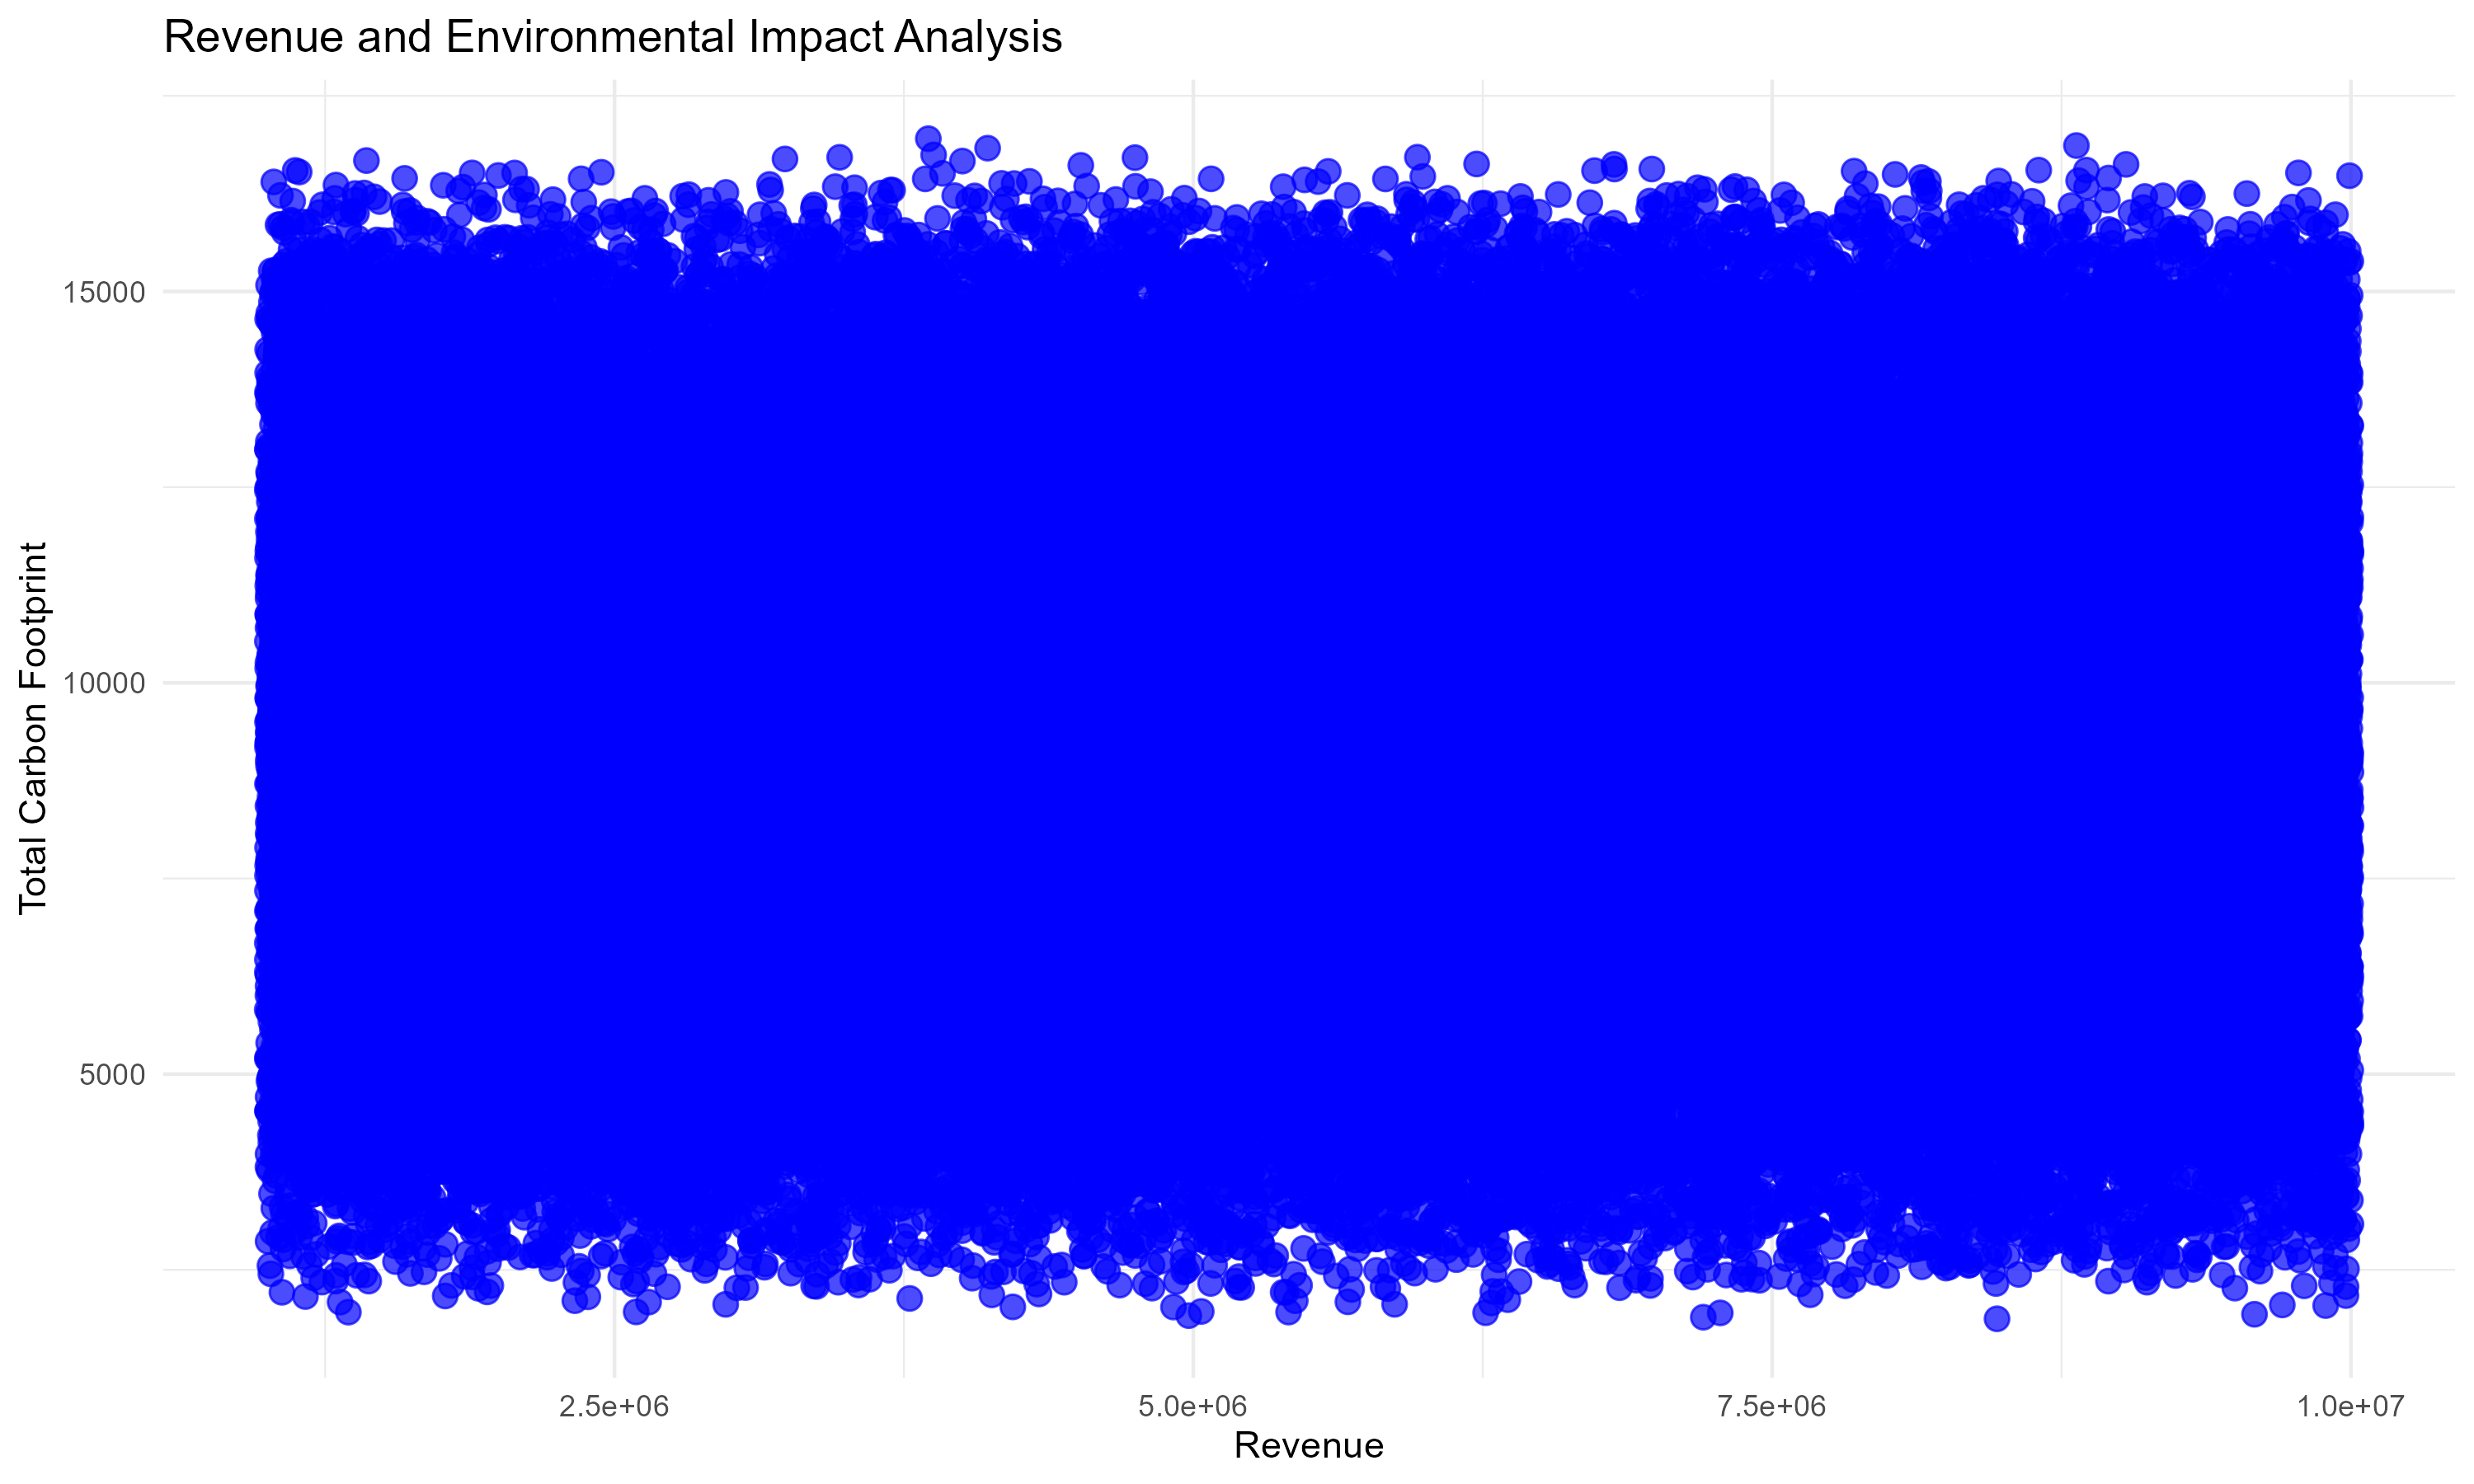

In [46]:
# import the library for display the png file
library(IRdisplay)
display_png(file = "revenue_impact_analysis.png")

#### Based on the scatter plot obtained, it appears that there is no clear trend or correlation between Revenue and Total_Carbon_Footprint. The data points are scattered across the graph, with a higher concentration towards the bottom left corner

#### so for further analysis we calculated the correlation coefficient between revenue and total carbon footprint.

In [47]:
# Calculate correlation coefficient
correlation_coefficient <- cor(cleaned_dataset$Revenue, cleaned_dataset$Total_Carbon_Footprint)

In [48]:
# Print the correlation coefficient
cat("Correlation Coefficient:", correlation_coefficient, "\n")

Correlation Coefficient: 0.001647812 


#### Based on the correlation coefficient value of 0.001647812, it can be concluded that there is a very weak positive correlation between the "Revenue" and "Total_Carbon_Footprint" variables.  The scatter plot also tells, as the data points were scattered without exhibiting any clear trend or pattern.

# Time Trends

#### Studying emissions over time (e.g., annual trends) may reveal patterns of improvement or areas of concern in carbon footprint management.

In [49]:
# Load necessary libraries
library(tidyverse)

In [50]:
# Read the cleaned dataset
cleaned_dataset <- read.csv("cleaned_carbon_footprint_calculated_dataset.csv")

In [51]:
# Visualize time trends in emissions
plot_time_trends <- ggplot(cleaned_dataset, aes(x = Year, y = Total_Carbon_Footprint)) +
  geom_line(color = "blue", linewidth = 1) +
  geom_point(color = "blue", size = 3) +
  labs(x = "Year", y = "Total Carbon Footprint", 
       title = "Time Trends in Carbon Footprint") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [52]:
# Save the plot
ggsave("time_trends_carbon_footprint.png", plot_time_trends, width = 8, height = 6)

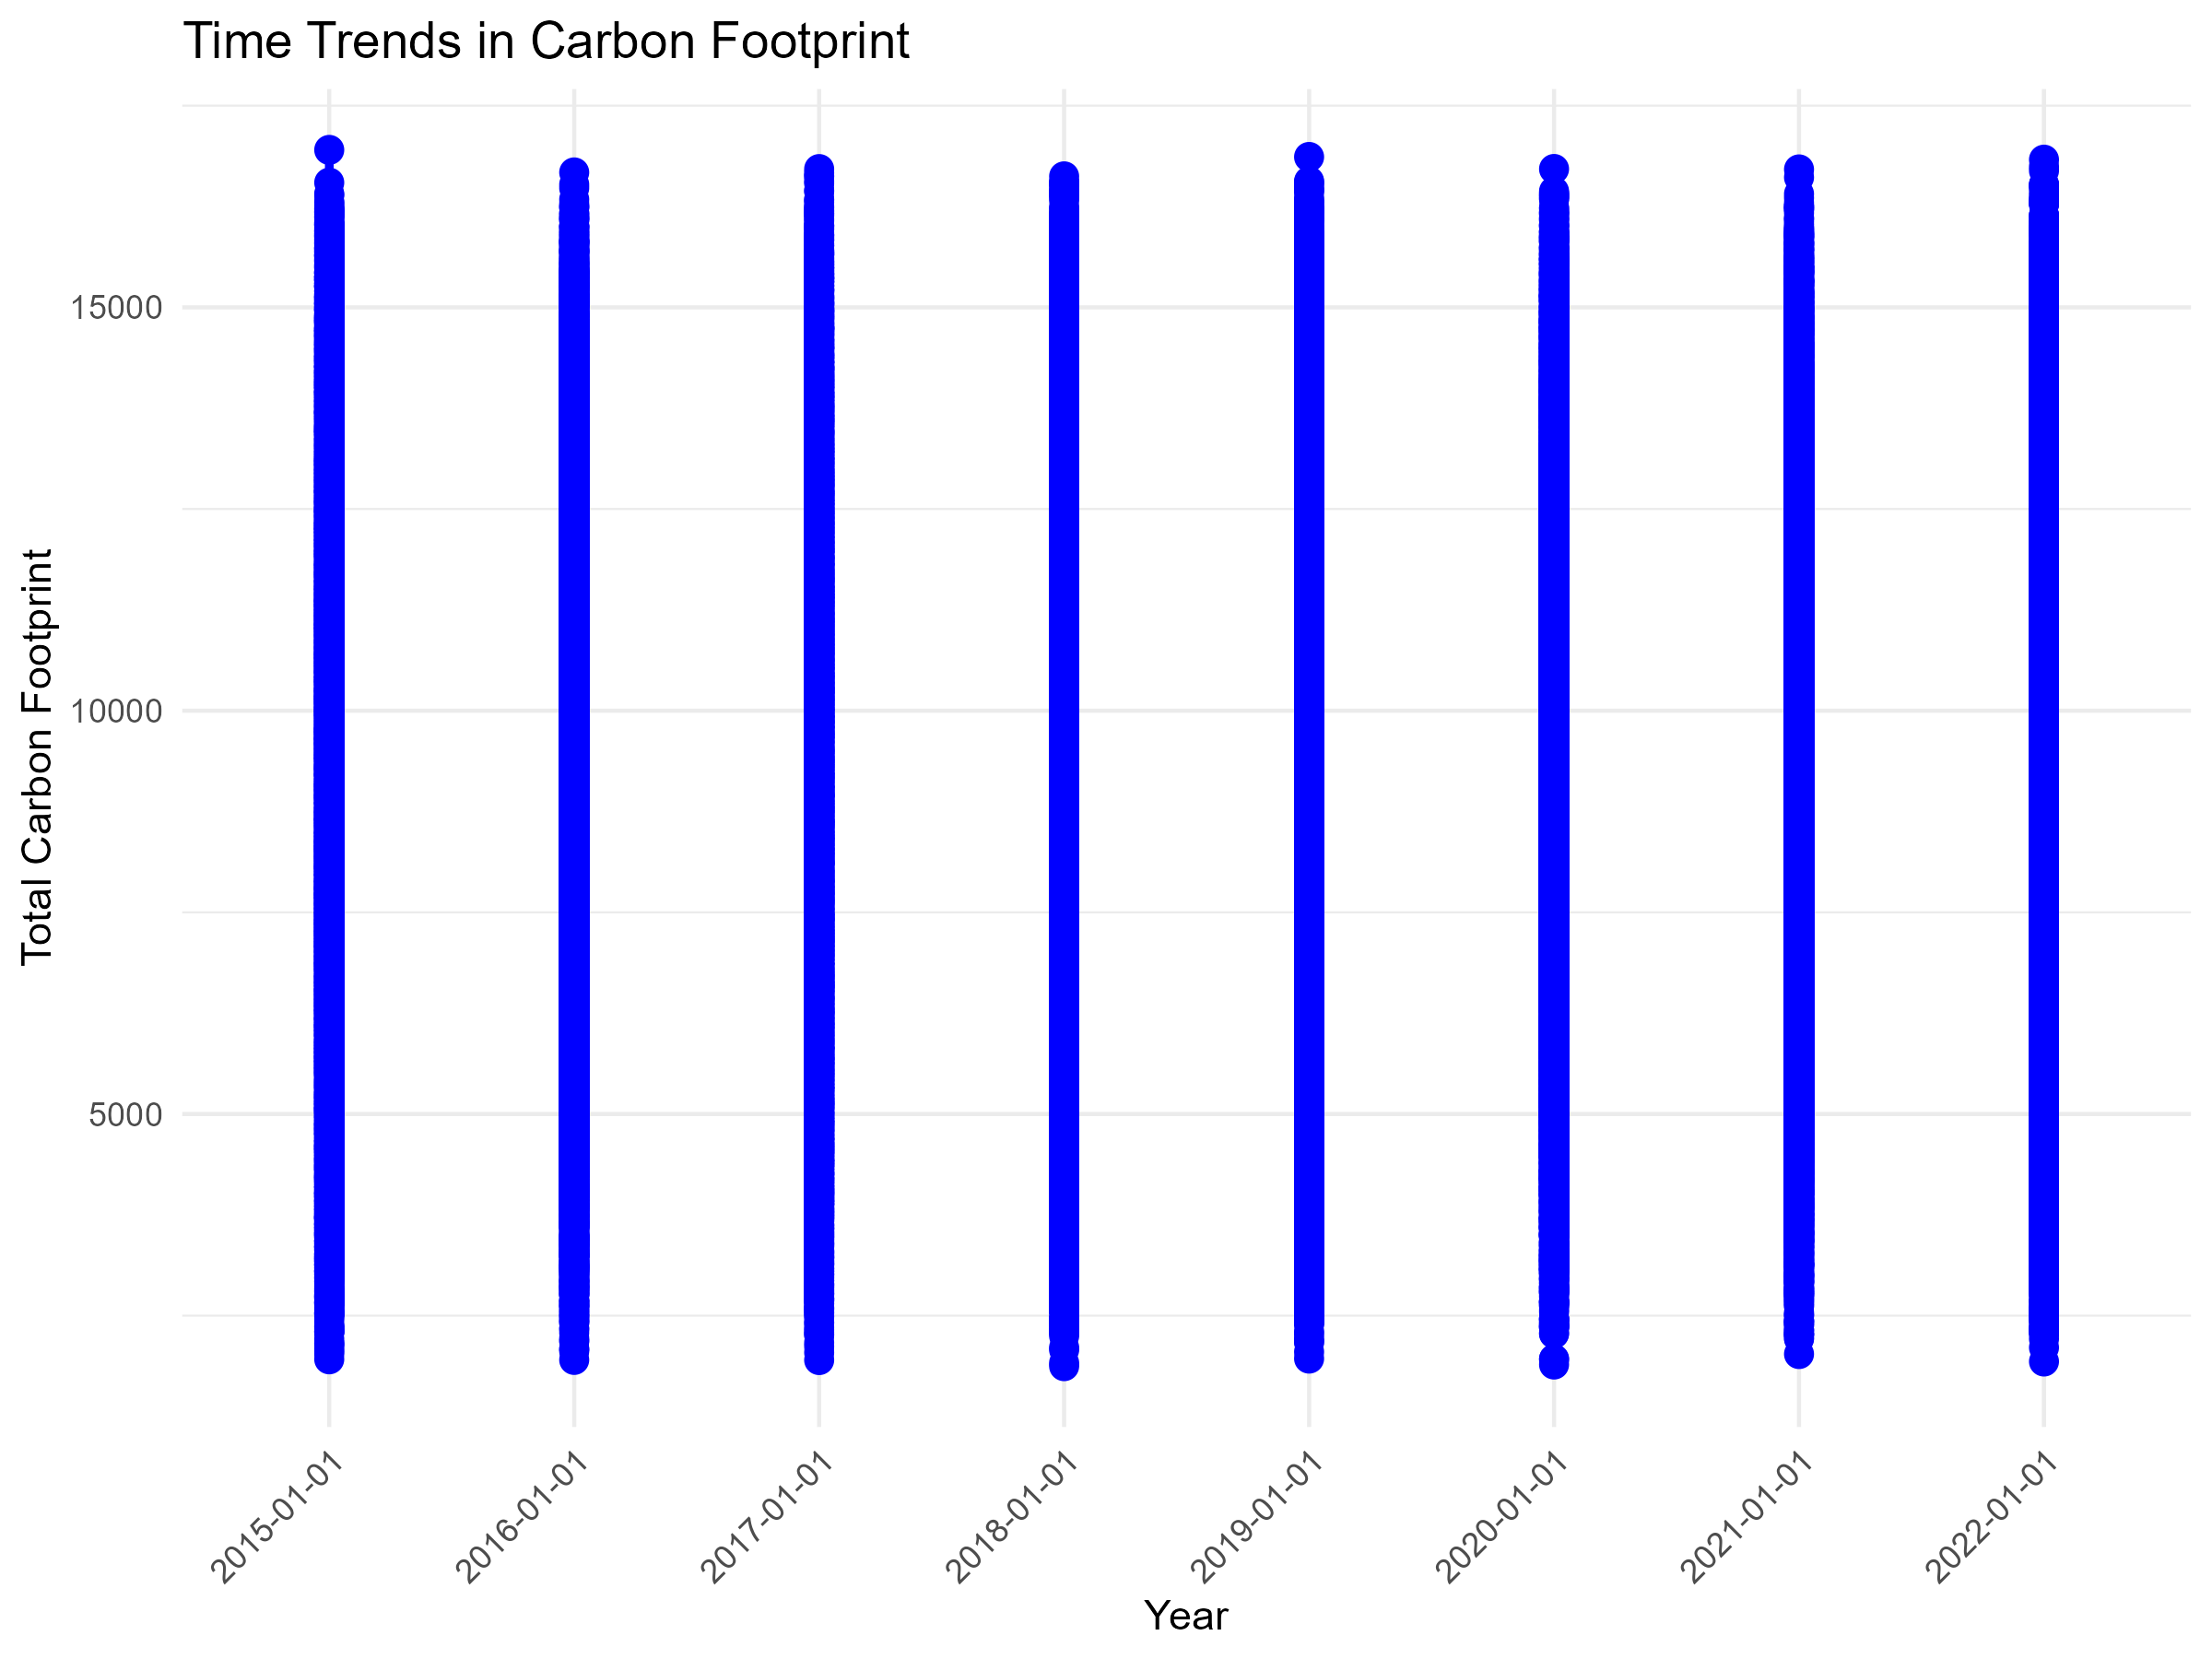

In [53]:
# import the library for display the png file
library(IRdisplay)
display_png(file = "time_trends_carbon_footprint.png")

#### This line plot show trends in carbon footprint over time.